In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import particle.literals
import pandas as pd

In [2]:
mtau = particle.literals.tau_minus.mass / 1000
fphi = mtau
alpha_em = 1/137

In [3]:
I1loop = lambda r: quad(lambda z: z**2*(2-z)/(1-z+z**2*r), 0, 1)[0]
L2loop = lambda r: quad(lambda z: (1-2*z*(1-z))/(z-z**2-r)*np.log(z*(1-z)/r), 0, 1)[0]

In [4]:
def atau_1loop(mphi):
    r = mtau**2/mphi**2
    return mtau**4/(8*np.pi**2*fphi**2*mphi**2)*I1loop(r)

def atau_2loop(mphi):
    r = mtau**2/mphi**2
    return -alpha_em/(8*np.pi**3)*mtau**4/(fphi**2*mphi**2)*L2loop(r)

atau_tot = lambda mphi: atau_1loop(mphi) + atau_2loop(mphi)

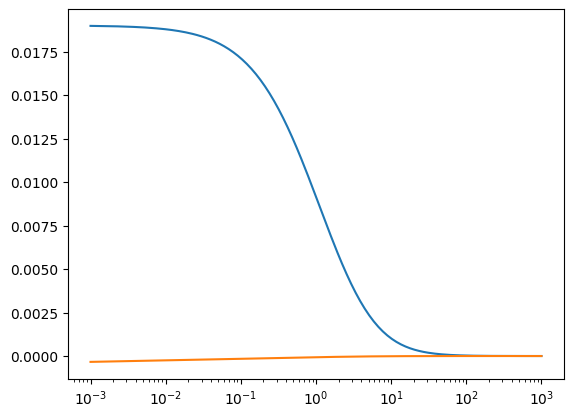

In [5]:
plt.semilogx(np.logspace(-3, 3, 200), [atau_1loop(mphi) for mphi in np.logspace(-3, 3, 200)])
plt.semilogx(np.logspace(-3, 3, 200), [atau_2loop(mphi) for mphi in np.logspace(-3, 3, 200)])

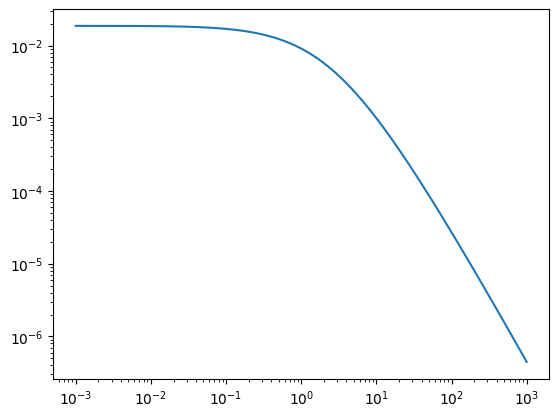

In [6]:
plt.loglog(np.logspace(-3, 3, 200), [atau_tot(mphi) for mphi in np.logspace(-3, 3, 200)])

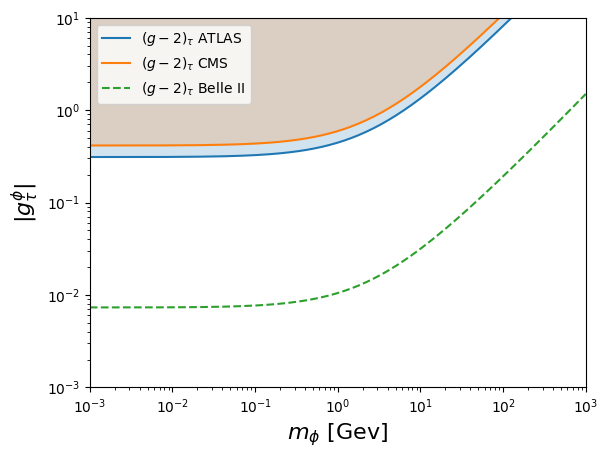

In [9]:
plt.loglog(np.logspace(-3, 3, 200), [(1.8e-3/atau_tot(mphi))**0.5 for mphi in np.logspace(-3, 3, 200)], label=r'$(g-2)_\tau$ ATLAS')
plt.fill_between(np.logspace(-3, 3, 200), [(1.8e-3/atau_tot(mphi))**0.5 for mphi in np.logspace(-3, 3, 200)], 1e4, alpha=0.2)
plt.loglog(np.logspace(-3, 3, 200), [(3.2e-3/atau_tot(mphi))**0.5 for mphi in np.logspace(-3, 3, 200)], label=r'$(g-2)_\tau$ CMS')
plt.fill_between(np.logspace(-3, 3, 200), [(3.2e-3/atau_tot(mphi))**0.5 for mphi in np.logspace(-3, 3, 200)], 1e4, alpha=0.2)
plt.loglog(np.logspace(-3, 3, 200), [(1e-6/atau_tot(mphi))**0.5 for mphi in np.logspace(-3, 3, 200)], label=r'$(g-2)_\tau$ Belle II', ls='dashed')
#plt.fill_between([1e-3, 1e3], [1000*np.sqrt(8*np.pi/3)/mtau, 1000*np.sqrt(8*np.pi/3)/mtau], [2e4, 2e4],  hatch='/', color='none', edgecolor='k', alpha=0.3)
plt.xlim(1e-3, 1e3)
plt.ylim(1e-3, 10)
plt.xlabel(r'$m_\phi$ [Gev]', fontsize=16)
plt.ylabel(r'$|g_\tau^\phi|$', fontsize=16)
plt.legend()

In [8]:
pd.DataFrame({'ma_GeV': np.logspace(-3, 3, 200), 'c_g2tau_ATLAS': [(1.8e-3/atau_tot(mphi))**0.5 for mphi in np.logspace(-3, 3, 200)], 'c_g2tau_BelleII': [(1e-6/atau_tot(mphi))**0.5 for mphi in np.logspace(-3, 3, 200)],  'c_g2tau_CMS24': [(3.2e-3/atau_tot(mphi))**0.5 for mphi in np.logspace(-3, 3, 200)]}).to_csv('../data/anomalous_moments/g2tau.csv', index=False)